### Importing all the important modules and libraries

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

### Reading data from the csv file

In [2]:
df = pd.read_csv("C:\\Projects\\DataScienceEndToEnd\\student-performance\\notebook\\data\\stud.csv")

### Showing first five rows 

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# In this we are going to predict the value of math_score byt aking all the other features as input features

### Seperating Between the Input data and their corresponding labels

In [18]:
X = df.drop("math_score",axis=1)
y = df['math_score']

In [19]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [20]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

### Defining the function to seperate and give the list of categorical features and numerical features

In [21]:
def get_cat_num(X):
    threshold = 0.05*X.shape[0]
    cat = []
    num = []
    for i in X.columns:
        if(X[i].nunique()<=threshold):
            cat.append(i)
        else:
            num.append(i)
    return cat,num

In [22]:
cat,num = get_cat_num(X)

### Categorical Features 

In [23]:
cat

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

### Numerical Features 

In [24]:
num

['reading_score', 'writing_score']

### Initializing the Column Transformer to transform the data i.e Preprocessing the data 

In [26]:
ct = ColumnTransformer([
    ('ct1',OrdinalEncoder(),[2,3]),
    ('ct2',OneHotEncoder(sparse_output=False,drop='first'),[0,1,4]),
    ('ct3',StandardScaler(),[5,6])
],remainder='passthrough')

### Fitting data into the column transformer and transform the data 

In [27]:
X = ct.fit_transform(X)

In [28]:
ct.get_feature_names_out()

array(['ct1__parental_level_of_education', 'ct1__lunch',
       'ct2__gender_male', 'ct2__race_ethnicity_group B',
       'ct2__race_ethnicity_group C', 'ct2__race_ethnicity_group D',
       'ct2__race_ethnicity_group E', 'ct2__test_preparation_course_none',
       'ct3__reading_score', 'ct3__writing_score'], dtype=object)

In [29]:
X= pd.DataFrame(X,columns=ct.get_feature_names_out())

In [30]:
X.head()

,ct1__parental_level_of_education,ct1__lunch,ct2__gender_male,ct2__race_ethnicity_group B,ct2__race_ethnicity_group C,ct2__race_ethnicity_group D,ct2__race_ethnicity_group E,ct2__test_preparation_course_none,ct3__reading_score,ct3__writing_score
0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.193999,0.391492
1,4.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.427476,1.313269
2,3.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.770109,1.642475
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.833899,-1.583744
4,4.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.605158,0.457333


### Dividing the data into training data and testing data for model training and model evaluation purpose

In [32]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)

(800, 10)
(200, 10)


### Dictionary of all the possible models which you can apply on the data (Without hyperparameter Tuning)

In [33]:
models = {
    'LinearRegression' : LinearRegression(),
    'SGD':SGDRegressor(alpha=0.1),
    'DTRegressor':DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(),
    'AdaBoost':AdaBoostRegressor(),
    'KNearest':KNeighborsRegressor()
}

### Defining the function to evaluate every model in "models" on the data 

In [56]:
def evaluateModel(modelName,Y_test,Y_pred):
    r2Score = r2_score(Y_test,Y_pred)
    meanAbsError = mean_absolute_error(Y_test,Y_pred)
    rootMeanSqError = np.sqrt(mean_squared_error(Y_test,Y_pred))
    dict1 ={
        'model':modelName,
        'r2Score':r2Score,
        'mean_absolute_error':meanAbsError,
        'root_mean_square_error':rootMeanSqError
    }
    return dict1

### Evaluating every single model in models and pront there evaluation metrics 

In [63]:
all1 = []
for name,model in models.items():
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    dict2 = evaluateModel(name,Y_test,Y_pred)
    all1.append(dict2)
    print(f"{name}:")
    print(f"{dict2}")
    print("---------------------------------------")
    print("\n")

LinearRegression:
{'model': 'LinearRegression', 'r2Score': 0.8792376008440074, 'mean_absolute_error': 4.215124584278568, 'root_mean_square_error': np.float64(5.4208974340768155)}
---------------------------------------


SGD:
{'model': 'SGD', 'r2Score': 0.863411291843351, 'mean_absolute_error': 4.467384668503929, 'root_mean_square_error': np.float64(5.765178028552625)}
---------------------------------------


DTRegressor:
{'model': 'DTRegressor', 'r2Score': 0.7093964618818895, 'mean_absolute_error': 6.585, 'root_mean_square_error': np.float64(8.40922112921286)}
---------------------------------------


RandomForest:
{'model': 'RandomForest', 'r2Score': 0.8471184714144765, 'mean_absolute_error': 4.73255, 'root_mean_square_error': np.float64(6.099339845881319)}
---------------------------------------


AdaBoost:
{'model': 'AdaBoost', 'r2Score': 0.8463684768293421, 'mean_absolute_error': 4.769028486006732, 'root_mean_square_error': np.float64(6.114282381270169)}
-------------------------

### List of all the dictionaries containing performance metrics of the model along with its name

In [64]:
all1

[{'model': 'LinearRegression',
  'r2Score': 0.8792376008440074,
  'mean_absolute_error': 4.215124584278568,
  'root_mean_square_error': np.float64(5.4208974340768155)},
 {'model': 'SGD',
  'r2Score': 0.863411291843351,
  'mean_absolute_error': 4.467384668503929,
  'root_mean_square_error': np.float64(5.765178028552625)},
 {'model': 'DTRegressor',
  'r2Score': 0.7093964618818895,
  'mean_absolute_error': 6.585,
  'root_mean_square_error': np.float64(8.40922112921286)},
 {'model': 'RandomForest',
  'r2Score': 0.8471184714144765,
  'mean_absolute_error': 4.73255,
  'root_mean_square_error': np.float64(6.099339845881319)},
 {'model': 'AdaBoost',
  'r2Score': 0.8463684768293421,
  'mean_absolute_error': 4.769028486006732,
  'root_mean_square_error': np.float64(6.114282381270169)},
 {'model': 'KNearest',
  'r2Score': 0.770773540057796,
  'mean_absolute_error': 5.846,
  'root_mean_square_error': np.float64(7.468574161110005)}]

### Converting that list into dataframe 

In [66]:
data = pd.DataFrame(all1)

In [67]:
data.head()

,model,r2Score,mean_absolute_error,root_mean_square_error
0,LinearRegression,0.879238,4.215125,5.420897
1,SGD,0.863411,4.467385,5.765178
2,DTRegressor,0.709396,6.585000,8.409221
3,RandomForest,0.847118,4.732550,6.099340
4,AdaBoost,0.846368,4.769028,6.114282


### Sorting the data frame with respect to r2Score of the models

In [68]:
data = data.sort_values(by='r2Score',ascending=False)

In [69]:
data.head()

,model,r2Score,mean_absolute_error,root_mean_square_error
0,LinearRegression,0.879238,4.215125,5.420897
1,SGD,0.863411,4.467385,5.765178
3,RandomForest,0.847118,4.732550,6.099340
4,AdaBoost,0.846368,4.769028,6.114282
5,KNearest,0.770774,5.846000,7.468574


In [70]:
# Now go on with Linear Regression

### Choosing the best model according to the previous data and predicting testing input data

In [71]:
lr = LinearRegression()
lr.fit(X_train,Y_train)
Y_pred = lr.predict(X_test)

<Axes: xlabel='math_score'>

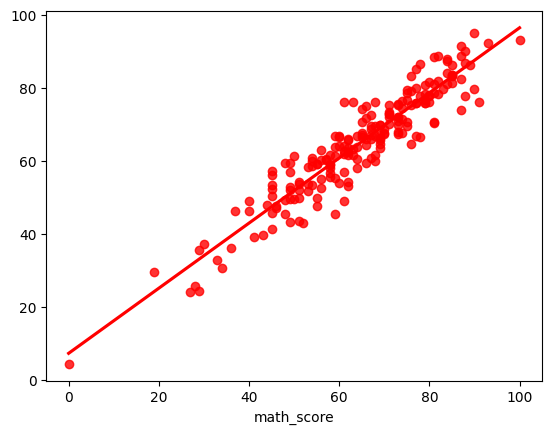

In [74]:
sns.regplot(x = Y_test,y=Y_pred,ci=None,color='red')

### Finding the difference between the predicted value and the actual value

In [75]:
diff = pd.DataFrame()

In [76]:
diff['True Value'] = Y_test

In [78]:
diff['Predicted Value'] = Y_pred
diff['difference'] = diff['True Value'] - diff['Predicted Value']

In [79]:
diff

,True Value,Predicted Value,difference
521,91,76.204877,14.795123
737,53,58.399627,-5.399627
740,80,77.743929,2.256071
660,74,76.417187,-2.417187
411,84,87.350202,-3.350202
...,...,...,...
408,52,42.822626,9.177374
332,62,62.269512,-0.269512
208,74,67.506937,6.493063
613,65,66.940080,-1.940080
